# Analisis Exploratorio de Datos (EDA) - Students Social Media Addiction
## Metodologia CRISP-DM (Version Extendida)

Este notebook documenta un analisis profundo sobre la adiccion a las redes sociales en estudiantes. El estudio sigue las fases de la metodologia **CRISP-DM** para asegurar un enfoque estructurado y orientado a resultados.

---

## 1. Entendimiento del Negocio

### 1.1 Contexto
En la ultima decada, las redes sociales han pasado de ser herramientas de comunicacion a ecosistemas complejos diseñados bajo la "economia de la atencion". Para los estudiantes, esto significa una exposicion constante a estimulos que pueden alterar habitos de sueño, rendimiento academico y salud mental.

### 1.2 Objetivos de Investigacion
- **Identificar Patrones**: Determinar que plataformas dominan el mercado estudiantil y como varia el consumo por demografia.
- **Evaluar Impacto**: Cuantificar la relacion entre el tiempo de uso y el bienestar (salud mental y sueño).
- **Analizar Riesgos**: Detectar si existe una correlacion negativa entre el puntaje de adiccion y el rendimiento academico.
- **Factores Sociales**: Explorar como el estado sentimental y los conflictos influyen en el comportamiento digital.

### 1.3 Criterios de Exito
- Identificacion clara de las plataformas de mayor riesgo y perfiles de usuario vulnerables.
- Visualizacion de la brecha de rendimiento academico y salud mental segun niveles de adiccion.
- Proveer una base solida para que los tomadores de decisiones puedan diseñar estrategias de intervencion.

## 2. Entendimiento de los Datos

### 2.1 Diccionario de Datos
Variables detectadas en el dataset:

| Columna Original | Descripcion |
|------------------|-------------|
| **Student_ID** | Identificador unico del estudiante. |
| **Age** | Edad del estudiante. |
| **Gender** | Genero del estudiante. |
| **Academic_Level** | Nivel academico (Undergraduate, High School, etc.). |
| **Country** | Pais de origen. |
| **Avg_Daily_Usage_Hours** | Horas promedio diarias en redes sociales. |
| **Most_Used_Platform** | Plataforma mas utilizada. |
| **Affects_Academic_Performance** | Si afecta el rendimiento (Yes/No). |
| **Sleep_Hours_Per_Night** | Horas de sueño por noche. |
| **Mental_Health_Score** | Puntaje de salud mental. |
| **Relationship_Status** | Estado sentimental (Single, In Relationship, etc.). |
| **Conflicts_Over_Social_Media** | Escala de conflictos por uso de redes sociales. |
| **Addicted_Score** | Puntaje de adiccion (final). |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import warnings

# Configuraciones globales
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Carga de datos
df = pd.read_csv('Students Social Media Addiction.csv')
print(f"Dataset cargado con {df.shape[0]} registros y {df.shape[1]} columnas.")

Dataset cargado con 705 registros y 13 columnas.


### 2.2 Exploracion Inicial e Insights Rapidos

In [2]:
# Estadisticas descriptivas generales
display(df.describe().T)

print("\n--- Distribucion Categorica ---")
for col in ['Gender', 'Most_Used_Platform', 'Academic_Level', 'Relationship_Status']:
    if col in df.columns:
        print(f"\nRecuento de {col}:")
        display(df[col].value_counts())

,count,mean,std,min,25%,50%,75%,max
Student_ID,705.0,353.000000,203.660256,1.0,177.0,353.0,529.0,705.0
Age,705.0,20.659574,1.399217,18.0,19.0,21.0,22.0,24.0
Avg_Daily_Usage_Hours,705.0,4.918723,1.257395,1.5,4.1,4.8,5.8,8.5
Sleep_Hours_Per_Night,705.0,6.868936,1.126848,3.8,6.0,6.9,7.7,9.6
Mental_Health_Score,705.0,6.226950,1.105055,4.0,5.0,6.0,7.0,9.0
Conflicts_Over_Social_Media,705.0,2.849645,0.957968,0.0,2.0,3.0,4.0,5.0
Addicted_Score,705.0,6.436879,1.587165,2.0,5.0,7.0,8.0,9.0



--- Distribucion Categorica ---

Recuento de Gender:


Gender
Female    353
Male      352
Name: count, dtype: int64


Recuento de Most_Used_Platform:


Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64


Recuento de Academic_Level:


Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


Recuento de Relationship_Status:


Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64

## 3. Preparacion de los Datos

In [3]:
# 3.1 Limpieza
df.columns = [c.strip() for c in df.columns]
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# 3.2 Manejo de nulos
df = df.dropna()

print("Datos limpios y listos para el analisis.")

Datos limpios y listos para el analisis.


---
## 4. Modelado (Analisis de Visualizaciones)


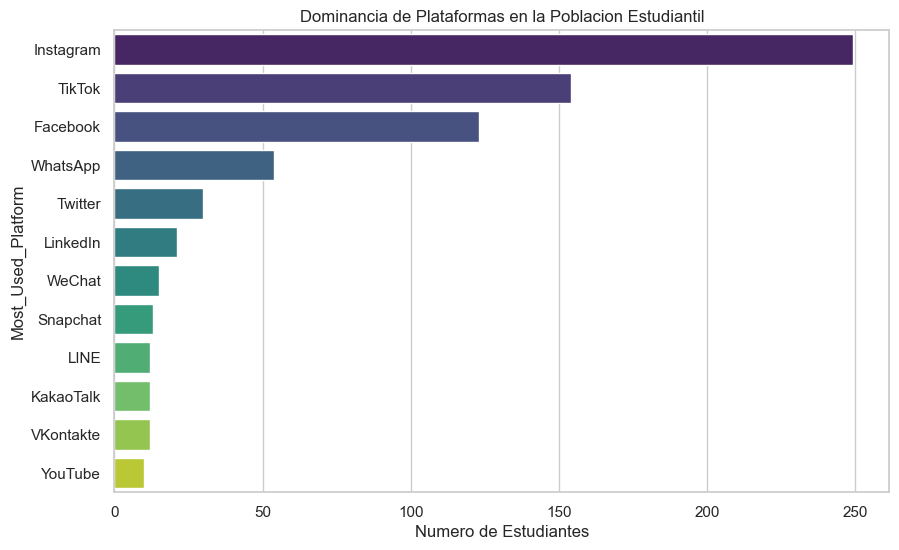

Proposito: Identificar que plataformas concentran la mayor atencion de los estudiantes.


In [4]:
# Grafico 1: Ecosistema de Plataformas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Most_Used_Platform', order=df['Most_Used_Platform'].value_counts().index, palette='viridis')
plt.title('Dominancia de Plataformas en la Poblacion Estudiantil')
plt.xlabel('Numero de Estudiantes')
plt.show()
print("Proposito: Identificar que plataformas concentran la mayor atencion de los estudiantes.")

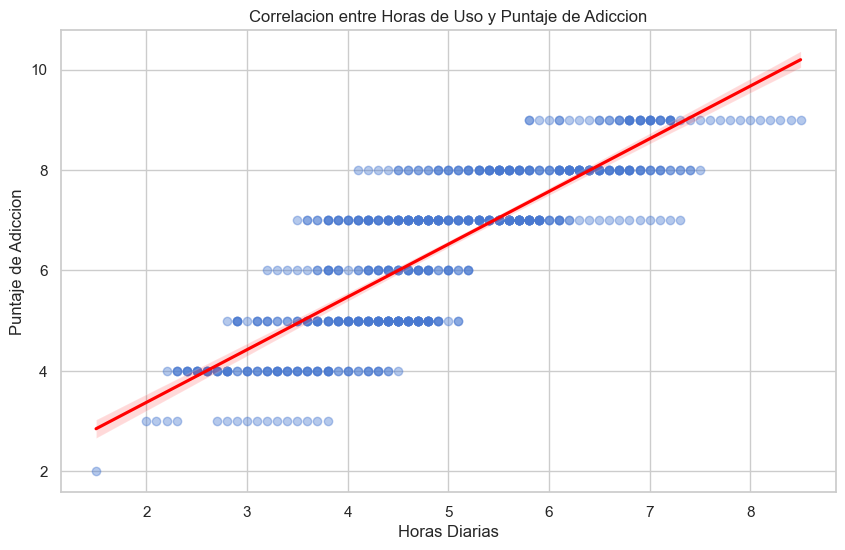

Proposito: Validar si existe una tendencia lineal clara entre el tiempo invertido y el sentimiento de adiccion.


In [5]:
# Grafico 2: Relacion Tiempo vs Puntaje de Adiccion
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Correlacion entre Horas de Uso y Puntaje de Adiccion')
plt.xlabel('Horas Diarias')
plt.ylabel('Puntaje de Adiccion')
plt.show()
print("Proposito: Validar si existe una tendencia lineal clara entre el tiempo invertido y el sentimiento de adiccion.")

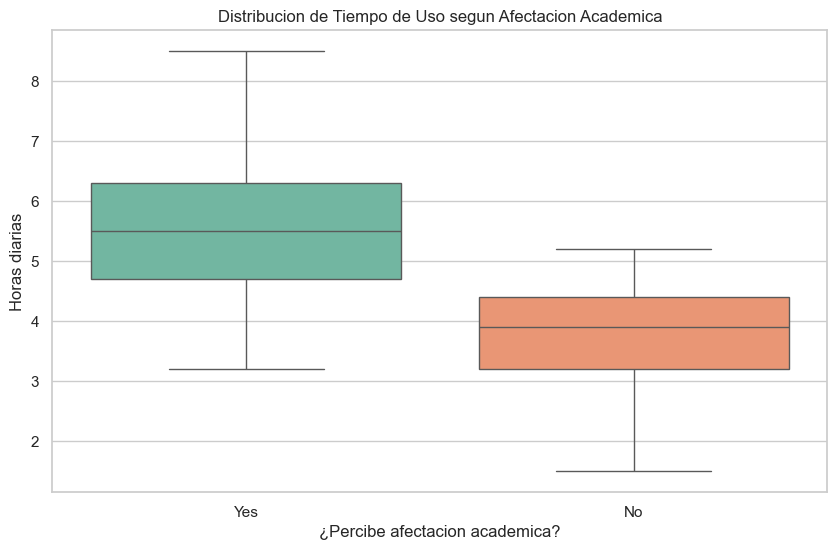

Proposito: Comparar si los estudiantes que perciben una afectacion realmente promedian mas horas de uso.


In [6]:
# Grafico 3: Tiempo de Uso vs Afectacion Academica
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', palette='Set2')
plt.title('Distribucion de Tiempo de Uso segun Afectacion Academica')
plt.xlabel('¿Percibe afectacion academica?')
plt.ylabel('Horas diarias')
plt.show()
print("Proposito: Comparar si los estudiantes que perciben una afectacion realmente promedian mas horas de uso.")

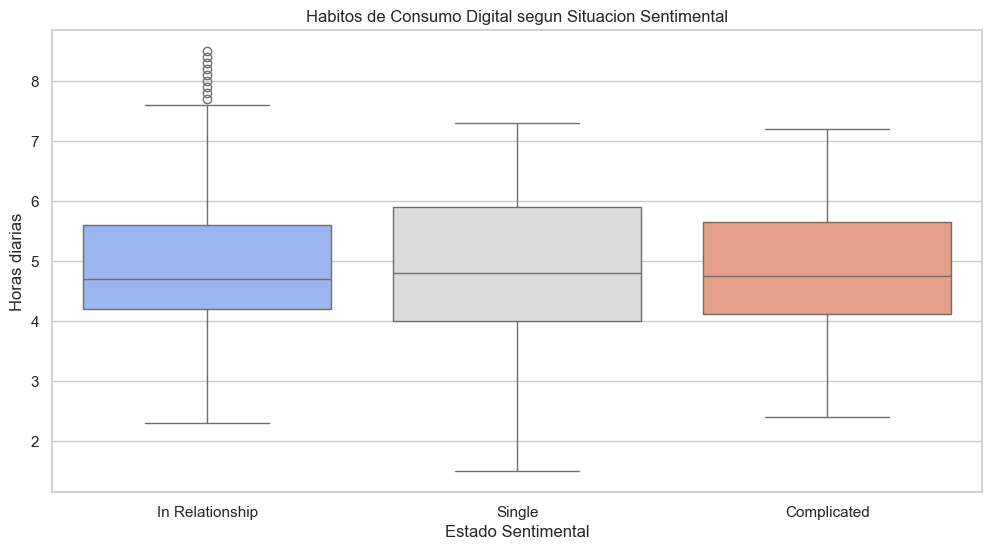

Proposito: Explorar si la vida social presencial (relaciones) influye en el tiempo dedicado a redes sociales.


In [7]:
# Grafico 4: Tiempo de Uso segun Estado Sentimental
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Relationship_Status', y='Avg_Daily_Usage_Hours', palette='coolwarm')
plt.title('Habitos de Consumo Digital segun Situacion Sentimental')
plt.xlabel('Estado Sentimental')
plt.ylabel('Horas diarias')
plt.show()
print("Proposito: Explorar si la vida social presencial (relaciones) influye en el tiempo dedicado a redes sociales.")

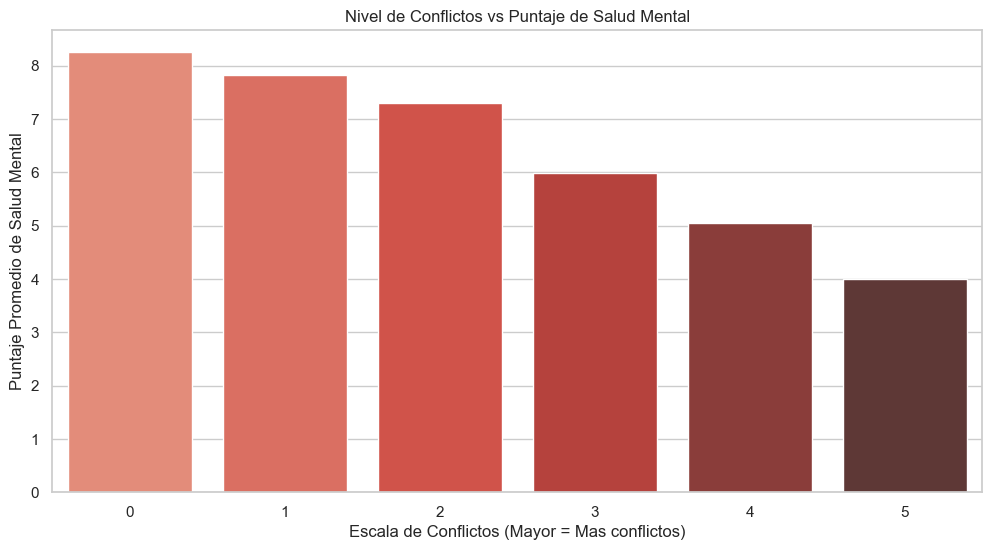

Proposito: Determinar si el aumento en la intensidad de conflictos digitales impacta negativamente el bienestar percibido.


In [8]:
# Grafico 5: Impacto de los Conflictos en la Salud Mental
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Conflicts_Over_Social_Media', y='Mental_Health_Score', ci=None, palette='Reds_d')
plt.title('Nivel de Conflictos vs Puntaje de Salud Mental')
plt.xlabel('Escala de Conflictos (Mayor = Mas conflictos)')
plt.ylabel('Puntaje Promedio de Salud Mental')
plt.show()
print("Proposito: Determinar si el aumento en la intensidad de conflictos digitales impacta negativamente el bienestar percibido.")

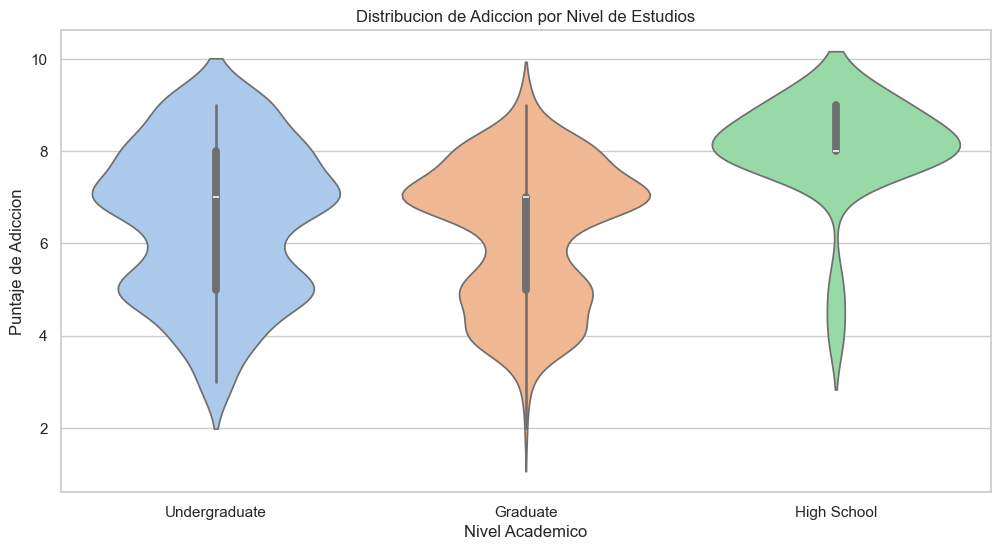

Proposito: Observar si la 'madurez academica' o la carga de estudio influye en la adiccion.


In [9]:
# Grafico 6: Adiccion segun Nivel Academico
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Academic_Level', y='Addicted_Score', palette='pastel')
plt.title('Distribucion de Adiccion por Nivel de Estudios')
plt.xlabel('Nivel Academico')
plt.ylabel('Puntaje de Adiccion')
plt.show()
print("Proposito: Observar si la 'madurez academica' o la carga de estudio influye en la adiccion.")

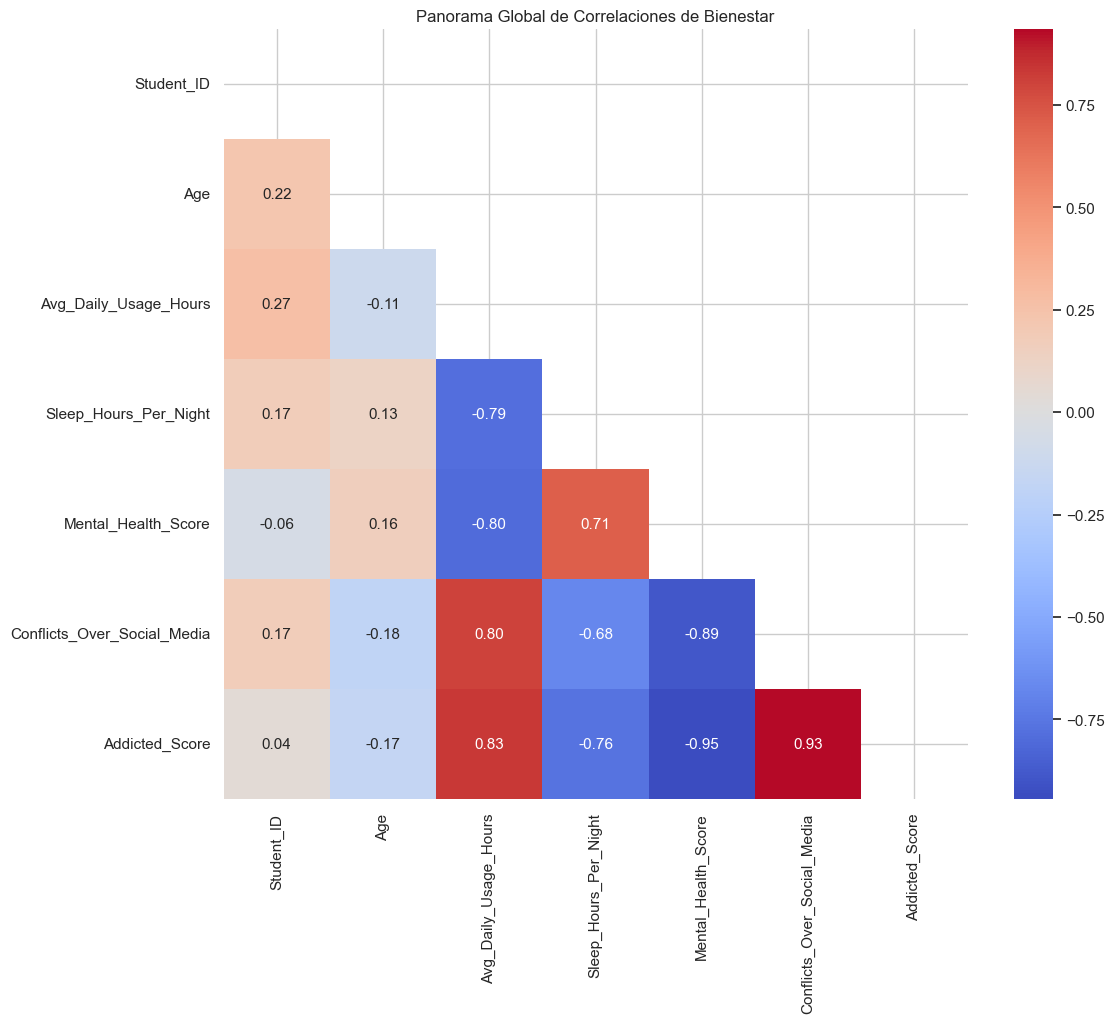

Proposito: Resumir estadisticamente todas las relaciones clave del dataset.


In [10]:
# Grafico 7: Matriz de Correlacion Global
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Panorama Global de Correlaciones de Bienestar')
plt.show()
print("Proposito: Resumir estadisticamente todas las relaciones clave del dataset.")

---
## 5. Evaluacion

**[ESPACIO PARA ANALISIS DE USUARIO]**

Basandose en las 7 visualizaciones presentadas:
1. ¿Cuales son los 3 insights mas criticos para una institucion educativa?
2. ¿Hay alguna plataforma que deba ser el foco de campañas de prevencion?
3. ¿Que papel juega la salud mental en este ecosistema? 